# <CENTER> Satellital Image Extraction

![alt text](https://water.usgs.gov/edu/pictures/full-size/icecaps-satellite-large.jpg)

### <center> WEBPAGE: https://satellites.pro/

### Import libraries

In [1]:
##Using selenium and Chrome
from selenium import webdriver
from selenium.common import exceptions
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import os
import cv2

### Define procedure to extract satellital image (WITHOUT CLEANING IT)

In [2]:
def extract_image_no_clean(url,chromedriver_path,image_name,lbl):
    ##Create a folder Maps to store image
    init=os.getcwd()
    try:
        os.makedirs(init+'//Maps')
    except:
        print("Folder already created")
    
    browser = webdriver.Chrome(chromedriver_path)
    browser.maximize_window()
    browser.get(url)#open_url with Selenium
    print (browser.title)
    
    ##WAIT FOR WEBPAGE TO LOAD
    time.sleep(3)

    ##get into folder to save the image
    os.chdir(init+'//Maps')
    ##get latitud and lng of the url 
    aa=url[url.find('#')+2:]
    #set the image name
    ##image_name=any
    ##lbl= put a label to the image
    name=image_name+'_'+aa+'_'+lbl+'.png'
    browser.save_screenshot(name)
    print('Image name:',name)
    #change to initial location
    os.chdir(init)

    ##close webdriver
    browser.quit()

### Use procedure created - no_clean
Procedure name: extract_image_no_clean

In [3]:
%%time
url='https://satellites.pro/Peru_map#E-12.130808,-76.982674,18'
chromedriver_path='chromedriver.exe'
extract_image_no_clean(url,chromedriver_path,'New_image','city')

Folder already created
🌎 satellite map of Peru
Image name: New_image_-12.130808,-76.982674,18_city.png
Wall time: 17.7 s


Observe the image without cleaning

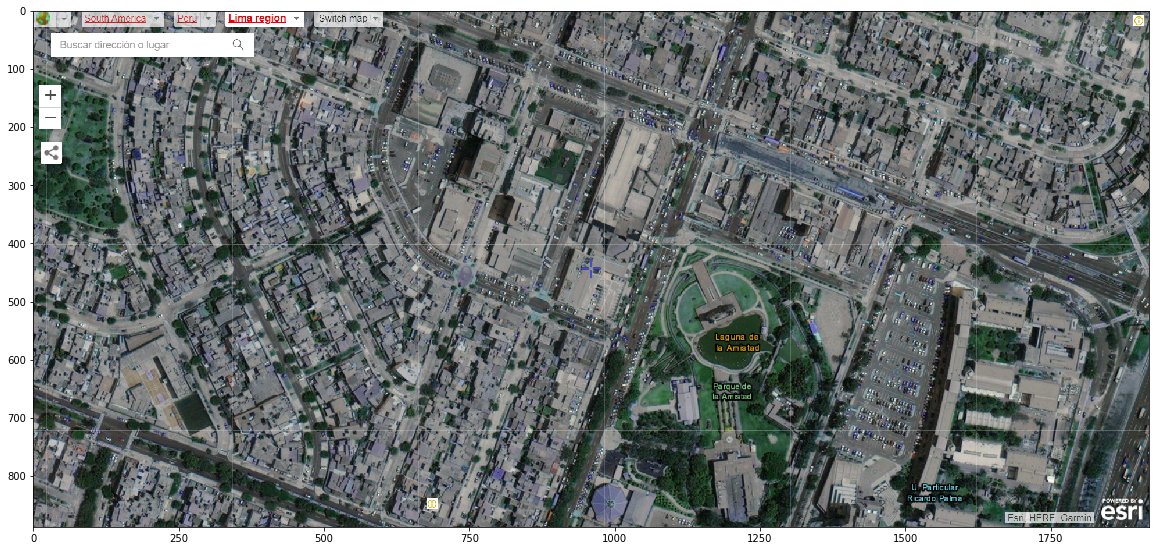

In [4]:
st_img = cv2.imread(os.getcwd()+'/Maps/New_image_-12.130808,-76.982674,18_city.png')
plt.figure(figsize = (20,10))
plt.imshow(st_img)

### Define procedure to extract satellital image - (Clean)
This procedure cleans the screen before saving the image

In [5]:
def extract_image(url,chromedriver_path,image_name,lbl):
    ##Create a folder: Maps to store image
    init=os.getcwd()
    try:
        os.makedirs(init+'//Maps')
    except:
        print("Folder already created")
    
    browser = webdriver.Chrome(chromedriver_path)
    browser.maximize_window()
    browser.get(url)#open_url with Selenium
    print (browser.title)
    
    ##WAIT FOR WEBPAGE TO LOAD
    time.sleep(3)

    ###REMOVE GOOGLE ADDS
    ##identify
    google_ads = browser.find_element_by_id('place1')
    ##erase
    browser.execute_script("""
    var element = arguments[0];
    element.parentNode.removeChild(element);
    """, google_ads)

    ### REMOVE map_headers
    map_headers = browser.find_element_by_id('mapheaders')
    browser.execute_script("""
    var element = arguments[0];
    element.parentNode.removeChild(element);
    """, map_headers)

    try:
        ### REMOVE search-container
        search_container = browser.find_element_by_id('search-container')
        browser.execute_script("""
        var element = arguments[0];
        element.parentNode.removeChild(element);
        """, search_container)
    except: 
        print('error search_container')

    time.sleep(1)

    ###REMOVE google_ads_frame2
    google_ads2 = browser.find_element_by_xpath("/html/body/div[@class='placea pa2']")
    browser.execute_script("""
    var element = arguments[0];
    element.parentNode.removeChild(element);
    """, google_ads2)

    time.sleep(1)
    try:
        ### REMOVE leaflet-bottom leaflet-left
        leaflet_bottoms = browser.find_element_by_xpath("/html/body/div[@id='map-canvas']/div[2]")
        browser.execute_script("""
        var element = arguments[0];
        element.parentNode.removeChild(element);
        """, leaflet_bottoms)
    except:
        print('error: map-canvas')

    time.sleep(1)
    
    try:
        ### REMOVE esri
        esri = browser.find_element_by_xpath("/html/body/div[@id='map-canvas']/div[@id='map-canvas_root']/div[2]")
        browser.execute_script("""
        var element = arguments[0];
        element.parentNode.removeChild(element);
        """, esri)
    except:
        print('error: esri')
    
    time.sleep(1)
    
    ### REMOVE map search
    search_cont = browser.find_element_by_id('map-canvas_zoom_slider')
    browser.execute_script("""
    var element = arguments[0];
    element.parentNode.removeChild(element);
    """, search_cont)


    time.sleep(1)

    ##REMOVE cross
    cross = browser.find_element_by_id('cross')
    browser.execute_script("""
    var element = arguments[0];
    element.parentNode.removeChild(element);
    """, cross)
    
    ##get into folder to save the image
    os.chdir(init+'//Maps')
    ##get latitud and lng of the url 
    aa=url[url.find('#')+2:]
    #set the image name
    ##image_name=any
    ##lbl= put a label to the image
    name=image_name+'_'+aa+'_'+lbl+'.png'
    browser.save_screenshot(name)
    
    print(name)
    #change to initial location
    os.chdir(init)

    ##close webdriver
    browser.quit()

In [6]:
##Make another function to specify latitude,longitude and zoom
##but with a specific type of map (ESRI)
def image_extract(latitud,longitud,zoom,chromedriver_path,image_name,lbl):
    url='https://satellites.pro/Peru_map#E'+str(latitud)+','+str(longitud)+','+str(zoom)
    extract_image(url,chromedriver_path,image_name,lbl)  

### Use procedure created - with clean
Procedure name: image_extract

In [7]:
%%time
chromedriver_path='chromedriver.exe'
##Define inputs
# url='https://satellites.pro/Peru_map#E-12.130808,-76.982674,18'
latitud=-12.130808
longitud=-76.982674
zoom=18
image_name='Clean_image'
lbl='city'
##use procedure
image_extract(latitud,longitud,zoom,chromedriver_path,image_name,lbl)

Folder already created
🌎 satellite map of Peru
Clean_image_-12.130808,-76.982674,18_city.png
Wall time: 22.5 s


This is the image completely clean

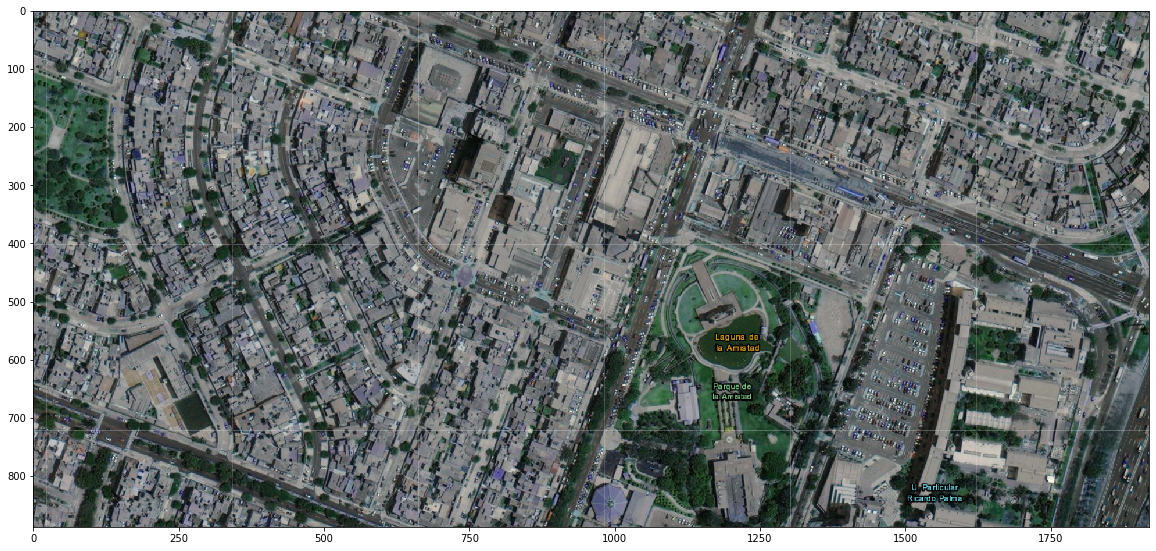

In [8]:
st_img = cv2.imread(os.getcwd()+'/Maps/Clean_image_-12.130808,-76.982674,18_city.png')
plt.figure(figsize = (20,10))
plt.imshow(st_img)